# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

# IPython Magic Functions
# will make plot outputs appear and be stored within the notebook.
%matplotlib inline 

# Defaults fot better plots
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

# Turn on interactive mode
plt.ion() 
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

# Loading datasets into Dataframes

In [3]:
dataset_name = "music4all"
dataset_relative_location = "../../dataset"

dataset_path = Path(dataset_relative_location) / dataset_name

In [4]:
### Get datset CSVs
csvsPattern = "*.csv"
csvs = list(dataset_path.glob(csvsPattern))
csvs

[PosixPath('../../dataset/music4all/id_tags.csv'),
 PosixPath('../../dataset/music4all/id_metadata.csv'),
 PosixPath('../../dataset/music4all/id_information.csv'),
 PosixPath('../../dataset/music4all/listening_history.csv'),
 PosixPath('../../dataset/music4all/id_lang.csv'),
 PosixPath('../../dataset/music4all/id_genres.csv')]

In [5]:
datasets = {}

for csv in csvs:
    datasets[csv.stem] = pd.read_csv(csv, delimiter="\t")

In [6]:
# Taking a look at the datasets we have
datasets.keys()

dict_keys(['id_tags', 'id_metadata', 'id_information', 'listening_history', 'id_lang', 'id_genres'])

# How many artists, songs and albuns do we have in the dataset ?

### Merging the datasets in one that has meaningfull song information

In [10]:
song_info = pd.merge(datasets['id_information'], datasets['id_genres'], on='id')
song_info = pd.merge(song_info, datasets['id_metadata'], on='id') # has release date info
song_info

,id,artist,song,album_name,genres,spotify_id,popularity,release,danceability,energy,key,mode,valence,tempo,duration_ms
0,0009fFIM1eYThaPg,Cheryl,Rain on Me,3 Words,pop,3eObKIfHKJ1nAPh0wTxFCc,12.0,2009,0.635,0.746,6.0,1.0,0.548,110.973,229947
1,0010xmHR6UICBOYT,Oddisee,After Thoughts,The Beauty in All,underground hip hop,27szvF97Tu95GxN98N52fy,46.0,2013,0.591,0.513,7.0,0.0,0.263,172.208,325096
2,002Jyd0vN4HyCpqL,Blue Öyster Cult,ME 262,Secret Treaties,"hard rock,rock,classic rock",273lBFpxUCwisTpdnF9cVb,31.0,1974,0.319,0.925,2.0,1.0,0.658,157.630,285693
3,006TYKNjNxWjfKjy,Rhapsody,Flames of Revenge,Legendary Years (Re-Recorded),"symphonic metal,power metal,symphonic power metal",1qZgergQ41vaD4zBf3AKXR,33.0,2017,0.432,0.979,7.0,1.0,0.162,90.008,332867
4,007LIJOPQ4Sb98qV,The Chameleons,Nostalgia,What Does Anything Mean? Basically (2009 Remas...,"post-punk,new wave",6rVxJ3sN3Cz40MSLavbG1K,19.0,2009,0.357,0.708,9.0,1.0,0.470,123.904,326067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109264,zzyyPUs7hC9Nz2e1,Frank Carter & The Rattlesnakes,Vampires,Modern Ruin,"hardcore punk,punk,hardcore",6IW5yPlWJYmXxRuuc7QkMx,36.0,2017,0.380,0.835,1.0,1.0,0.539,142.699,200880
109265,zzz0n04uuTUA7fNh,Justin Bieber,Heartbreaker,Journals,pop,21pCToQdqcPi879auxjxKe,48.0,2014,0.572,0.503,6.0,0.0,0.553,103.215,262840
109266,zzzj3LYaZtYtbzSr,Regina Spektor,Après Moi - Live In London,Live In London,singer-songwriter,2SJ6FGmRPacKE9N4g4BRZU,21.0,2010,0.402,0.376,2.0,0.0,0.119,108.509,276507
109267,zzznMjZAKnJJXQSj,Dua Lipa,New Rules (Initial Talk Remix),New Rules (Initial Talk Remix),"synthpop,remix,pop",2ygfHXyt3gvyhvKrNJU61n,47.0,2017,0.532,0.977,10.0,0.0,0.966,116.527,224549


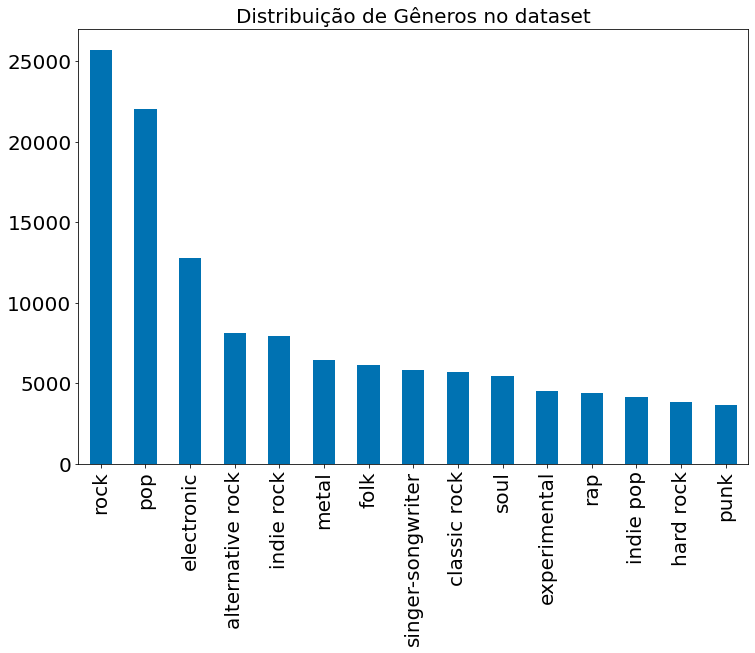

In [11]:
def plot_genre_distribution(df):
    # Needs a genre column
    genres = ",".join(df['genres']).split(",")
    genres_count = pd.Series(genres).value_counts()
    most_popular_genres = genres_count[:100]
    # Plot the 15 most popular
    ax = most_popular_genres[:15].plot.bar(title="Distribuição de Gêneros no dataset")

plot_genre_distribution(song_info)

### We have less songs/albuns//artists than ids because there are songs, albuns and artists with the same name

id            109269
artist         16269
song           87915
album_name     38363
dtype: int64

Songs: 109269
Artists: 16269
Albuns: 38363


<AxesSubplot:title={'center':'Musicas, artistas, musicas únicas e albuns'}>

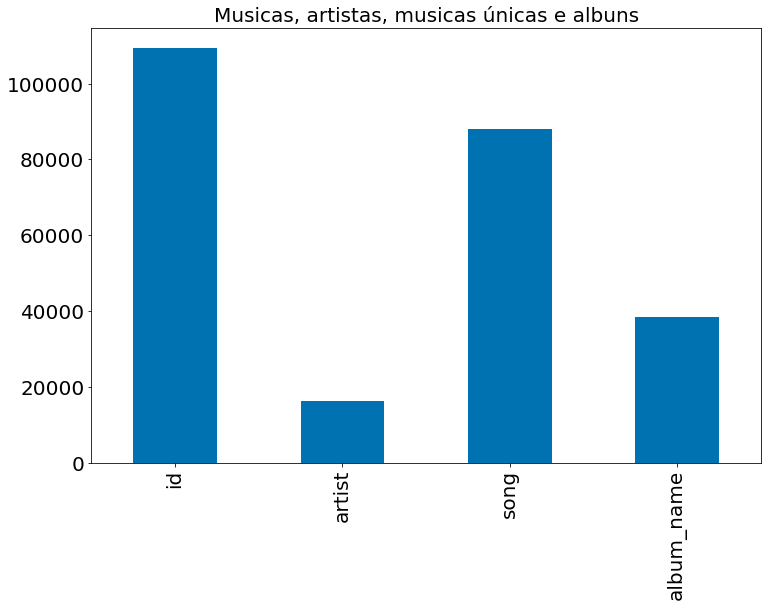

In [12]:
df_info = datasets["id_information"]
unique = df_info.nunique()

print(unique)
print(f"\nSongs: {unique[0]}\nArtists: {unique[1]}\nAlbuns: {unique[3]}")
unique.plot.bar(title="Musicas, artistas, musicas únicas e albuns")

# What is the genre distribution ?

### Genres comes in a list for every song separated by commas
### We join into a big string, then split by commas to count each genre. 
### A genre can have multiple words

In [13]:
genres_df = datasets["id_genres"].copy(deep=True)
genres = ",".join(genres_df['genres']).split(",")
genres[:10]

['pop',
 'underground hip hop',
 'hard rock',
 'rock',
 'classic rock',
 'symphonic metal',
 'power metal',
 'symphonic power metal',
 'post-punk',
 'new wave']

In [14]:
# Get the the series as dataframe to count the values
genres_count = pd.Series(genres).value_counts()

# Get the first 100 most common
most_common_genres = genres_count[:100]
most_common_genres

rock                25731
pop                 22013
electronic          12769
alternative rock     8103
indie rock           7943
                    ...  
christian rock        350
drone                 346
avant-garde           343
mathcore              337
grindcore             334
Length: 100, dtype: int64

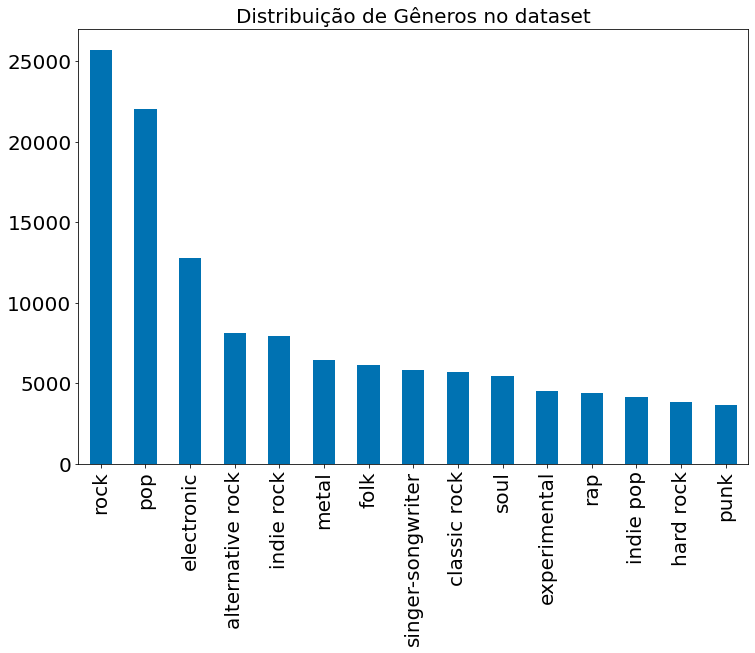

In [15]:
ax = most_common_genres[:15].plot.bar(title="Distribuição de Gêneros no dataset")

# Qual a distribuição das tags ?

In [16]:
# Getting the tags
tags_df = datasets["id_tags"].copy(deep=True)

# Counting the tags
tags = ",".join(tags_df['tags']).split(",")
tags_count = pd.Series(tags).value_counts()

# Getting the most common tags in the dataset
most_common_tags = tags_count[:100]
most_common_tags

rock              25731
pop               22013
indie             17539
alternative       13114
electronic        12769
                  ...  
japanese            936
trap                917
male vocalists      881
garage rock         878
disco               856
Length: 100, dtype: int64

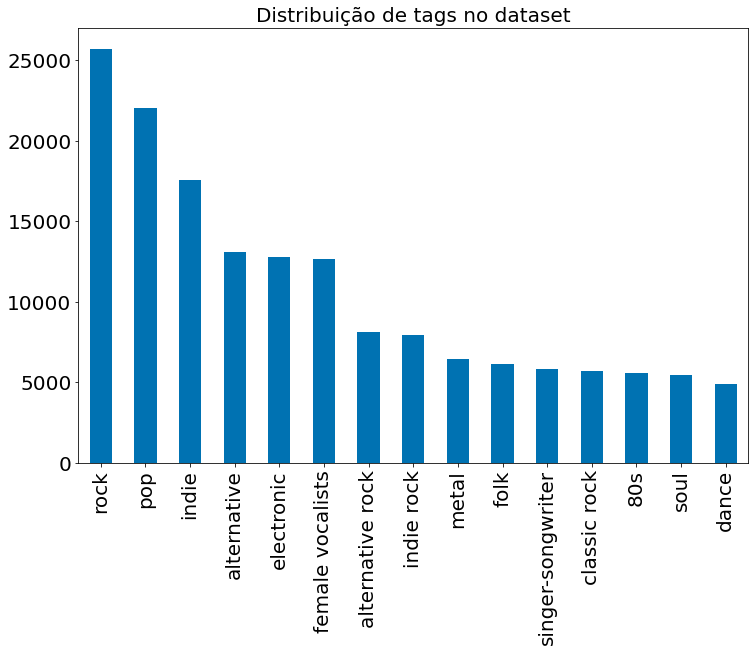

In [18]:
ax = most_common_tags[:15].plot.bar(title="Distribuição de tags no dataset")

# The dataset is too big, so we are going to work is the first 20000 entries


In [20]:
working_dataset = song_info[:30000].copy(deep=True)
working_dataset.describe()

,popularity,release,danceability,energy,key,mode,valence,tempo,duration_ms
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04
mean,35.069367,2005.773867,0.518439,0.669331,5.292867,0.623233,0.444561,122.595709,2.427007e+05
std,14.775539,15.579064,0.172683,0.240950,3.572066,0.484584,0.251305,28.953765,9.860945e+04
min,0.000000,1013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.777300e+04
25%,25.000000,2001.000000,0.401000,0.505000,2.000000,0.000000,0.237000,100.152750,1.932000e+05
50%,34.000000,2011.000000,0.526000,0.716000,5.000000,1.000000,0.424000,120.971500,2.271600e+05
75%,45.000000,2016.000000,0.643000,0.873000,9.000000,1.000000,0.638250,140.023000,2.720730e+05
max,90.000000,2019.000000,0.980000,1.000000,11.000000,1.000000,0.998000,221.947000,3.964682e+06


In [21]:
# Export the dataset to csv to use it later
working_dataset.to_csv("../code/dataset/song_info_release_date_dataset_with_30000_entries.csv", index = None, header=True)

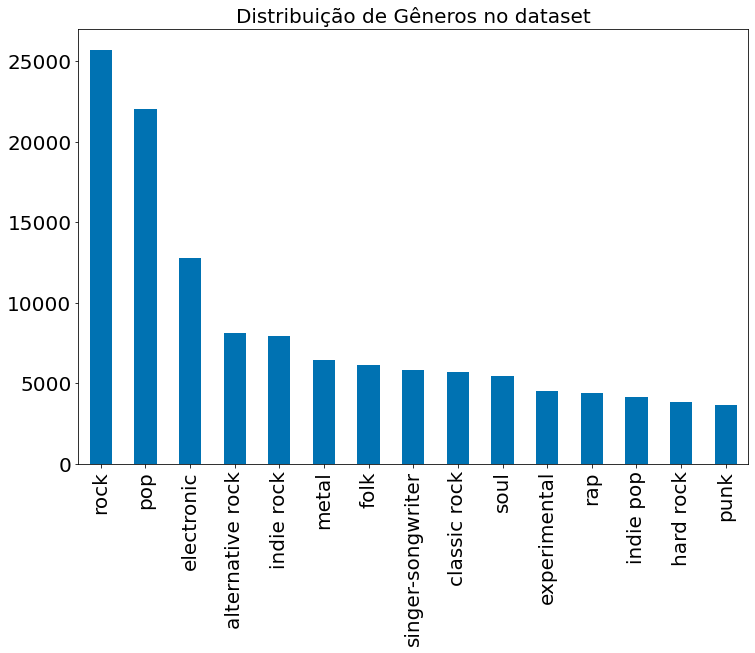

In [49]:
# Plot the histogram of the whole dataset
plot_genre_distribution(song_info)

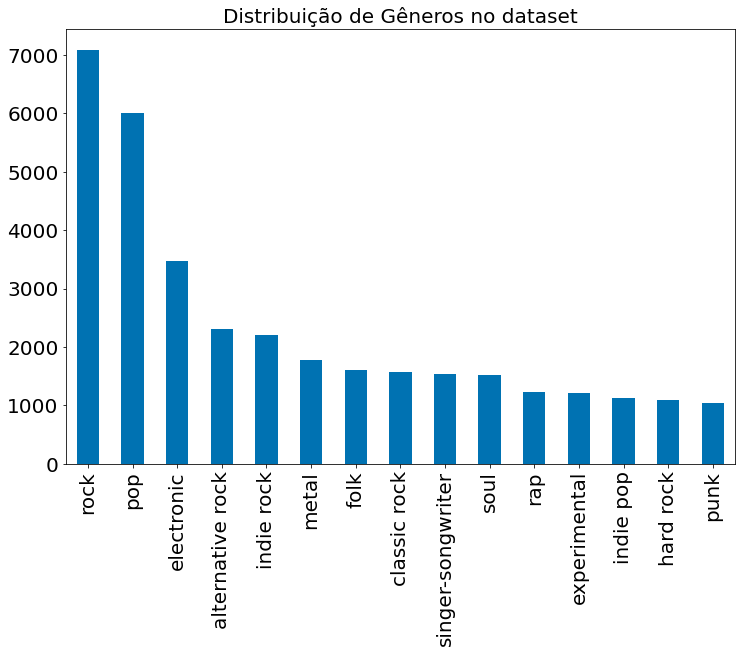

In [11]:
# Plot the genre histogram of the cut dataset
plot_genre_distribution(working_dataset)

# Taking a look at the listening history of the users

In [8]:
datasets['listening_history'].describe()

,user,song,timestamp
count,5109592,5109592,5109592
unique,14127,99596,122340
top,user_dndf78il,32m5suoC94ytD8Ed,2019-02-08 20:35
freq,500,82871,175


In [14]:
listening_history = datasets['listening_history']
listening_history

,user,song,timestamp
0,user_007XIjOr,DaTQ53TUmfP93FSr,2019-02-20 12:28
1,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-20 12:35
2,user_007XIjOr,qUm54NYOjeFhmKYx,2019-02-20 12:48
3,user_007XIjOr,FtnuMT1DlevSR2n5,2019-02-20 12:52
4,user_007XIjOr,LHETTZcSZLeaVOGh,2019-02-20 13:09
...,...,...,...
5109587,user_zzWscYTy,BBiswLufo26YQCT7,2019-01-10 15:57
5109588,user_zzWscYTy,5ZHgff3sjETIiedr,2019-01-10 16:21
5109589,user_zzWscYTy,m4O1iLh6fC43xjRy,2019-01-10 16:48
5109590,user_zzWscYTy,mvUaP8k67qOFfA65,2019-01-10 21:13


# Selecting one user to check its listening history to see what it is like

In [15]:
some_user = lh[lh["user"] == "user_007XIjOr"]
some_user

,user,song,timestamp
0,user_007XIjOr,DaTQ53TUmfP93FSr,2019-02-20 12:28
1,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-20 12:35
2,user_007XIjOr,qUm54NYOjeFhmKYx,2019-02-20 12:48
3,user_007XIjOr,FtnuMT1DlevSR2n5,2019-02-20 12:52
4,user_007XIjOr,LHETTZcSZLeaVOGh,2019-02-20 13:09
...,...,...,...
435,user_007XIjOr,1gEApUktf4hN25zC,2019-03-05 23:14
436,user_007XIjOr,LxpGP4Ys3MgvhqRZ,2019-03-05 23:32
437,user_007XIjOr,LxpGP4Ys3MgvhqRZ,2019-03-05 23:32
438,user_007XIjOr,LxpGP4Ys3MgvhqRZ,2019-03-05 23:38


In [22]:
## Ranaming column to make a merge
renamed_df = some_user.rename(columns = {'song':'id'})
some_user_songs = pd.merge(renamed_df, song_info, on='id')
some_user_songs

,user,id,timestamp,artist,song,album_name,genres
0,user_007XIjOr,DaTQ53TUmfP93FSr,2019-02-20 12:28,Mitski,Your Best American Girl,Puberty 2,"indie rock,noise pop,indie rock,dream pop"
1,user_007XIjOr,DaTQ53TUmfP93FSr,2019-02-26 18:09,Mitski,Your Best American Girl,Puberty 2,"indie rock,noise pop,indie rock,dream pop"
2,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-20 12:35,ionnalee,LIKE HELL,EVERYONE AFRAID TO BE FORGOTTEN,"synthpop,art pop,downtempo"
3,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-25 13:25,ionnalee,LIKE HELL,EVERYONE AFRAID TO BE FORGOTTEN,"synthpop,art pop,downtempo"
4,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-28 23:25,ionnalee,LIKE HELL,EVERYONE AFRAID TO BE FORGOTTEN,"synthpop,art pop,downtempo"
...,...,...,...,...,...,...,...
435,user_007XIjOr,0jx1O7OwEExV2q1y,2019-03-05 22:44,Sufjan Stevens,I Walked,The Age of Adz,"singer-songwriter,electronic,experimental,elec..."
436,user_007XIjOr,0jx1O7OwEExV2q1y,2019-03-05 22:49,Sufjan Stevens,I Walked,The Age of Adz,"singer-songwriter,electronic,experimental,elec..."
437,user_007XIjOr,LxpGP4Ys3MgvhqRZ,2019-03-05 23:32,Julia Holter,Maxim's II,Loud City Song,experimental
438,user_007XIjOr,LxpGP4Ys3MgvhqRZ,2019-03-05 23:32,Julia Holter,Maxim's II,Loud City Song,experimental


In [24]:
def get_transition_timestamps(df):
    list_of_lists = []
    
    # first row is a transition to itself, # source, # target, # timestamp
    list_of_lists.append([df.loc[0, "song"], df.loc[0, "song"],  df.loc[0, "timestamp"]])

    # from 0 to n-1
    for i in range(0, len(df) - 1) :
        list_of_lists.append([df.loc[i, "song"], df.loc[i + 1, "song"],  df.loc[i + 1, "timestamp"]])

    return list_of_lists    

def get_transition_df(transition_ts):
    return pd.DataFrame(transition_ts, columns=["source", "target", "timestamp"])

# Get the listening history of the user as a dataset that every line is a transition
transition_ts = get_transition_timestamps(some_user_songs)

# Making into a dataframe 
transitions = pd.DataFrame(transition_ts, columns=["source", "target", "timestamp"])
transitions

,source,target,timestamp
0,Your Best American Girl,Your Best American Girl,2019-02-20 12:28
1,Your Best American Girl,Your Best American Girl,2019-02-26 18:09
2,Your Best American Girl,LIKE HELL,2019-02-20 12:35
3,LIKE HELL,LIKE HELL,2019-02-25 13:25
4,LIKE HELL,LIKE HELL,2019-02-28 23:25
...,...,...,...
435,Abbey,I Walked,2019-03-05 22:44
436,I Walked,I Walked,2019-03-05 22:49
437,I Walked,Maxim's II,2019-03-05 23:32
438,Maxim's II,Maxim's II,2019-03-05 23:32
